# Telecom Churn Case Study

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.


# Business Goal of the Project
 
 The main goal of the case study is to analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.


# Objective of the Project


1. Analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.
2. Build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

The main goal of the case study is to build ML models to predict churn. The predictive model that we have to build will the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.



# Other important points

1. Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model. 

2. The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret.

3. Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. 

# Data Dictionary

Acronyms	Description

    CIRCLE_ID	Telecom circle area to which the customer belongs to
    LOC	Local calls  within same telecom circle
    STD	STD calls  outside the calling circle
    IC	Incoming calls
    OG	Outgoing calls
    T2T	Operator T to T ie within same operator mobile to mobile
    T2M    	Operator T to other operator mobile
    T2O    	Operator T to other operator fixed line
    T2F    	Operator T to fixed lines of T
    T2C    	Operator T to its own call center
    ARPU    	Average revenue per user
    MOU    	Minutes of usage  voice calls
    AON    	Age on network  number of days the customer is using the operator T network
    ONNET   	All kind of calls within the same operator network
    OFFNET    	All kind of calls outside the operator T network
    ROAM	Indicates that customer is in roaming zone during the call
    SPL   	Special calls
    ISD    	ISD calls
    RECH    	Recharge
    NUM    	Number
    AMT    	Amount in local currency
    MAX    	Maximum
    DATA    	Mobile internet
    3G    	G network
    AV    	Average
    VOL    	Mobile internet usage volume in MB
    2G    	G network
    PCK    	Prepaid service schemes called  PACKS
    NIGHT    	Scheme to use during specific night hours only
    MONTHLY    	Service schemes with validity equivalent to a month
    SACHET   	Service schemes with validity smaller than a month
    *.6    	KPI for the month of June
    *.7    	KPI for the month of July
    *.8    	KPI for the month of August
    FB_USER	Service scheme to avail services of Facebook and similar social networking sites
    VBC    	Volume based cost  when no specific scheme is not purchased and paid as per usage

In [1]:
# Import necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for RFE

# Libraries for Logistic regression 

# Libraries for Random Forest

# Libraries for Ensemble

# Libraries for PCA

# Libraries for Evaluation metrics


In [2]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [3]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
train_data.shape

(69999, 172)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [7]:
#Find the % of missing values of each row
row_null = 100 * train_data.isnull().sum(axis=1)/train_data.shape[1]
row_null[row_null> 70] # Display the rows which has more than 70% of null values

296      72.093023
423      70.348837
569      72.093023
642      70.348837
658      71.511628
1245     71.511628
2001     71.511628
2115     72.093023
2324     72.674419
2423     72.093023
2512     71.511628
3103     72.093023
3198     72.093023
3625     72.093023
3679     71.511628
4063     71.511628
4213     71.511628
4590     72.093023
4597     72.093023
4668     72.093023
4681     72.093023
4729     71.511628
4855     71.511628
4973     70.348837
5479     72.093023
5706     72.674419
5827     72.093023
5832     72.093023
6153     70.348837
6359     72.093023
6427     70.348837
6961     72.093023
7137     72.093023
7242     72.093023
7261     70.348837
7291     72.674419
7436     71.511628
7450     72.093023
7451     72.674419
7709     72.093023
7879     72.093023
7987     72.093023
8436     70.348837
8764     70.930233
8984     72.093023
9120     71.511628
9241     72.093023
9358     70.348837
9460     72.093023
9548     72.093023
9715     71.511628
9737     72.674419
10635    70.

In [8]:
# Display all the columns which has single value. 
train_data.nunique()[train_data.nunique() == 1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

# Data Cleaning

# Drop the columns which has more than 70% of missing values

In [9]:
# Display all the columns which has more than 70% of missing values
column_null = 100 * train_data.isnull().sum()/train_data.shape[0] 
column_null[column_null>70]

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.478207
night_pck_us

In [10]:
column_null[column_null>70].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [11]:
# Drop the columns which has more than 70% of missing values
train_data = train_data.drop(column_null[column_null>70].index,axis=1)

In [12]:
train_data.shape

(69999, 142)

# Drop the columns which has single value

In [13]:
#Single value columns
single_value_columns = train_data.nunique()[train_data.nunique() == 1].index

In [14]:
# remove all the columns which has single value, we don't need those columns for our analysis

train_data = train_data.drop(single_value_columns,axis=1)

In [15]:
train_data.shape

(69999, 129)

In [16]:
100*train_data.isnull().sum()/train_data.shape[0]

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t

In [ ]:
##############################################

In [173]:
train_data[['date_of_last_rech_6','last_day_rch_amt_6']][train_data['date_of_last_rech_6'].isnull()].head(20)

,date_of_last_rech_6,last_day_rch_amt_6
28,NaN,0
95,NaN,0
293,NaN,0
351,NaN,0
498,NaN,0
503,NaN,0
658,NaN,0
888,NaN,0
914,NaN,0
964,NaN,0


In [174]:
train_data[['date_of_last_rech_6','last_day_rch_amt_6']][train_data['last_day_rch_amt_6']==0].head(20)

,date_of_last_rech_6,last_day_rch_amt_6
1,6/12/2014,0
15,6/27/2014,0
19,6/28/2014,0
26,6/14/2014,0
28,NaN,0
30,6/20/2014,0
37,6/14/2014,0
44,6/29/2014,0
46,6/27/2014,0
51,6/30/2014,0


In [201]:
#Find the % of missing values of each row
row_null = 100 * train_data.isnull().sum(axis=1)/train_data.shape[1]
len(row_null[row_null> 50]) # Display the rows which has more than 50% of null values

758

In [202]:
# Find the churn_probability for missing value rows
temp_rows = train_data.iloc[row_null[row_null>50].index,:]
temp_rows['churn_probability'].value_counts()

1    539
0    219
Name: churn_probability, dtype: int64

In [203]:
train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [ ]:
#########################################

In [17]:
# Get the categorical variables
cat_var = train_data.select_dtypes('object').columns
# Get the Numerical variables
num_var = train_data.drop(cat_var,axis=1).columns

In [18]:
print("Categorical variables",cat_var)
print("Numerical variables", num_var)

Categorical variables Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')
Numerical variables Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=126)


In [19]:
# Display the value counts of all categorical columns
for i in cat_var:
    print(i)
    print(train_data[i].value_counts())
    print("----------------------------------------- ")

date_of_last_rech_6
6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
6/28/2014     6752
6/26/2014     3918
6/25/2014     3402
6/24/2014     2888
6/17/2014     2887
6/14/2014     2686
6/21/2014     2654
6/23/2014     2060
6/18/2014     1886
6/12/2014     1746
6/22/2014     1624
6/13/2014     1468
6/19/2014     1387
6/20/2014     1252
6/16/2014      783
6/15/2014      605
6/11/2014      398
6/8/2014       368
6/5/2014       229
6/7/2014       223
6/10/2014      200
6/3/2014       172
6/1/2014       155
6/9/2014       135
6/6/2014       123
6/4/2014        90
6/2/2014        78
Name: date_of_last_rech_6, dtype: int64
----------------------------------------- 
date_of_last_rech_7
7/31/2014    12206
7/30/2014     9716
7/25/2014     6577
7/29/2014     6320
7/28/2014     5370
7/27/2014     4136
7/26/2014     3765
7/24/2014     2750
7/19/2014     2144
7/22/2014     2061
7/20/2014     1999
7/17/2014     1915
7/16/2014     1687
7/23/2014     1590
7/21/2014     1138
7/15/2014     1102
7/1

**Observation**

1. In our dataset we have Jun, July and August months information of telecom firm customers of the year 2014.
2. Columns date_of_last_rech_6 is June month information, date_of_last_rech_7 is July month information, date_of_last_rech_8, is August month information.

**Decision:**

    We can keep only the day information of all the above columns


In [20]:
# Creat a new columns for day,day_of_last_rech_6, day_of_last_rech_7,day_of_last_rech_8 from the corresponding date column 

train_data['day_of_last_rech_6'] = pd.DatetimeIndex(train_data['date_of_last_rech_6']).day

train_data['day_of_last_rech_7'] = pd.DatetimeIndex(train_data['date_of_last_rech_7']).day

train_data['day_of_last_rech_8'] = pd.DatetimeIndex(train_data['date_of_last_rech_8']).day



In [21]:
# Drop the date columns date_of_last_rech_6, date_of_last_rech_7,date_of_last_rech_8 which we already considered
date_list = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']
train_data = train_data.drop(date_list,axis=1)

In [22]:
# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

# Univariate Analysis


C:\Users\bvpra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


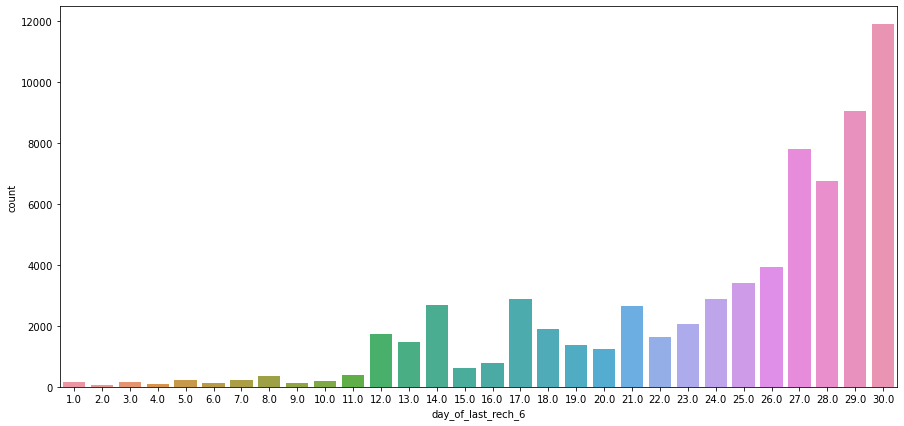

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(train_data['day_of_last_rech_6'])
plt.show()

In [27]:
train_data['day_of_last_rech_6'].mean()

24.128131440680427

# Data Imputation

In [37]:
# Display the last day recharch amount on June month for day of last recharge on June is null
train_data[['day_of_last_rech_6','last_day_rch_amt_6']][train_data['day_of_last_rech_6'].isnull()].head(20)

,day_of_last_rech_6,last_day_rch_amt_6
28,NaN,0
95,NaN,0
293,NaN,0
351,NaN,0
498,NaN,0
503,NaN,0
658,NaN,0
888,NaN,0
914,NaN,0
964,NaN,0


**Observation**

The missing value for day_of_last_rech_6 means not recharged , we can replace the null value with value 0 

Similarly we can replace the null value of day_of_last_rech_7 and day_of_last_rech_8 with value 0

In [40]:
train_data['day_of_last_rech_6'] = train_data['day_of_last_rech_6'].fillna(0)

In [42]:
train_data['day_of_last_rech_7'].fillna(0,inplace = True)
train_data['day_of_last_rech_8'].fillna(0,inplace = True)

In [43]:
# Find the % of missing values in each column
print(100*train_data.isnull().sum()/train_data.shape[0])

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

In [87]:
# Display the columns which has missing values
column_null = 100*train_data.isnull().sum()/train_data.shape[0]
null_col_name = column_null[column_null!=0].index
print(column_null[column_null!=0])
print(len(column_null[column_null!=0]))

onnet_mou_6         3.954342
onnet_mou_7         3.838626
onnet_mou_8         5.290076
offnet_mou_6        3.954342
offnet_mou_7        3.838626
offnet_mou_8        5.290076
roam_ic_mou_6       3.954342
roam_ic_mou_7       3.838626
roam_ic_mou_8       5.290076
roam_og_mou_6       3.954342
roam_og_mou_7       3.838626
roam_og_mou_8       5.290076
loc_og_t2t_mou_6    3.954342
loc_og_t2t_mou_7    3.838626
loc_og_t2t_mou_8    5.290076
loc_og_t2m_mou_6    3.954342
loc_og_t2m_mou_7    3.838626
loc_og_t2m_mou_8    5.290076
loc_og_t2f_mou_6    3.954342
loc_og_t2f_mou_7    3.838626
loc_og_t2f_mou_8    5.290076
loc_og_t2c_mou_6    3.954342
loc_og_t2c_mou_7    3.838626
loc_og_t2c_mou_8    5.290076
loc_og_mou_6        3.954342
loc_og_mou_7        3.838626
loc_og_mou_8        5.290076
std_og_t2t_mou_6    3.954342
std_og_t2t_mou_7    3.838626
std_og_t2t_mou_8    5.290076
std_og_t2m_mou_6    3.954342
std_og_t2m_mou_7    3.838626
std_og_t2m_mou_8    5.290076
std_og_t2f_mou_6    3.954342
std_og_t2f_mou

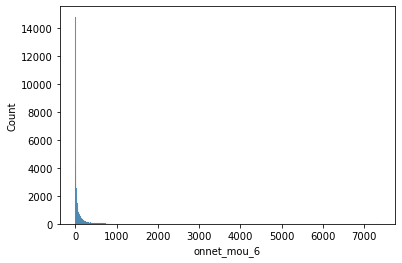

In [76]:
sns.histplot(train_data['onnet_mou_6'])
plt.show()

In [70]:
train_data['onnet_mou_6'].mean()

133.15327467984406

In [71]:
train_data['onnet_mou_6'].median()

34.11

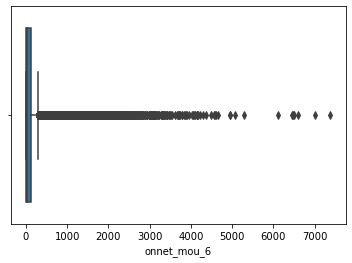

In [73]:
sns.boxplot(data = train_data,x = 'onnet_mou_6')
plt.show()

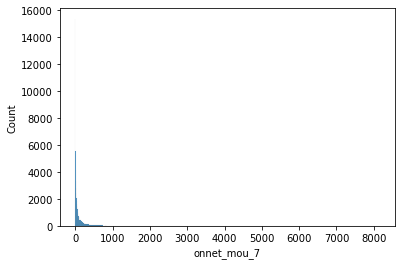

In [79]:
sns.histplot(train_data['onnet_mou_7'])
plt.show()

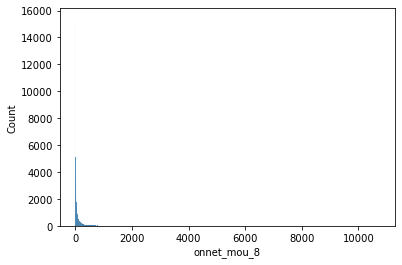

In [80]:
sns.histplot(train_data['onnet_mou_8'])
plt.show()

In [85]:
train_data[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257
std,299.963093,311.277193,311.896596
min,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000
50%,34.110000,32.280000,32.100000
75%,119.390000,115.837500,115.060000
max,7376.710000,8157.780000,10752.560000


In [100]:
# Check the statistical values of columns which has null values
train_data[null_col_name].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,...,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,...,33.077030,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214
std,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,...,108.469864,0.164823,0.137322,0.148417,60.951165,63.604165,63.097570,12.149144,13.225373,11.697686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000,34.860000,32.240000,31.575000,0.000000,0.000000,0.000000,0.000000,...,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,0.000000,0.000000,0.000000,0.000000,...,5.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119.390000,115.837500,115.060000,232.990000,227.630000,229.345000,0.000000,0.000000,0.000000,0.000000,...,27.615000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,4155.830000,4169.810000,3775.110000,...,5658.740000,19.760000,13.460000,16.860000,6789.410000,5289.540000,4127.010000,1362.940000,1495.940000,1209.860000


**Observation**

The above statistical data shows that all the columns has outliers so we can use the median (50th percentile ) to replace the null values of these columns.

In [104]:
# Replace all the null values of the above columns with median value 
for i in null_col_name:
    median = train_data[i].median()
    train_data[i].fillna(median,inplace = True)

In [106]:
# Check the dataset for null values
100 * train_data.isnull().sum()/train_data.shape[0]

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

# EDA and Data Analysis

In [134]:
train_data.groupby('churn_probability').total_rech_amt_6.median()

churn_probability
0    228
1    236
Name: total_rech_amt_6, dtype: int64

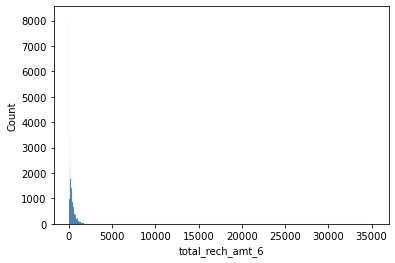

In [110]:
sns.histplot(data = train_data,x ='total_rech_amt_6')
plt.show()

In [115]:
train_data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,...,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887,23.748625,25.056072,24.547508
std,20207.115084,334.213918,344.366927,351.924315,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,...,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502,6.786483,6.627534,7.612726
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,...,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000,20.000000,22.000000,24.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000,27.000000,27.000000,27.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000,29.000000,30.000000,30.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000,30.000000,31.000000,31.000000


# Descriptive Statistical Analysis

In [179]:
# Display the Descriptive Statistical Information
train_data.describe(percentiles=[0.01,.05,0.1,.2,.25,.5,.75,.8,.9,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,...,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887,23.748625,25.056072,24.547508
std,20207.115084,334.213918,344.366927,351.924315,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,...,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502,6.786483,6.627534,7.612726
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1%,699.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,188.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5%,3499.900000,1.500000,0.919000,0.000000,0.000000,0.000000,0.000000,0.960000,0.760000,0.460000,...,0.000000,0.000000,229.000000,0.000000,0.000000,0.00000,0.000000,12.000000,11.000000,5.000000
10%,6999.800000,32.248600,29.761200,18.210600,0.360000,0.250000,0.210000,7.960000,7.010000,6.480000,...,0.000000,0.000000,286.000000,0.000000,0.000000,0.00000,0.000000,14.000000,16.000000,13.000000
20%,13999.600000,74.710600,69.075600,64.199200,4.810000,4.230000,4.260000,26.740000,24.510000,24.340000,...,0.000000,0.000000,401.000000,0.000000,0.000000,0.00000,0.000000,18.000000,20.000000,22.000000
25%,17499.500000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,...,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000,20.000000,22.000000,24.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000,27.000000,27.000000,27.000000


**Fact**

High value customers, who are regular in recharging, recharge with high amount and high usage of the services.

Average revenue per unit (ARPU) measures the earnings generated per user 

Some important columns are 

June month columns: 

'total_rech_num_6','total_rech_amt_6','max_rech_amt_6','last_day_rch_amt_6','total_ic_mou_6','total_og_mou_6'

July month columns:
'total_rech_num_7','total_rech_amt_7','max_rech_amt_7','last_day_rch_amt_7','total_ic_mou_7','total_og_mou_7',

August month columns:'total_rech_num_8','total_rech_amt_8','max_rech_amt_8','last_day_rch_amt_8','total_ic_mou_8','total_og_mou_8'


In [177]:
train_data[['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']].describe(percentiles=[0.01,.05,0.1,.2,.25,.5,.75,.8,.9,.95,.99])

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,63.426949,59.294218,62.489478
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,97.954876,95.429492,101.996729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,3.000000,3.000000,2.000000,80.000000,65.000000,60.000000,30.000000,30.000000,26.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,30.000000,30.000000,30.000000


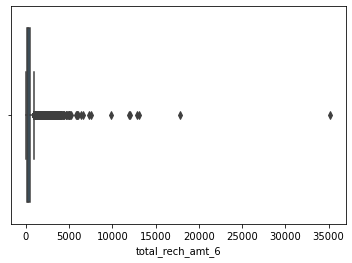

In [131]:
sns.boxplot(data = train_data,x= 'total_rech_amt_6')
plt.show()

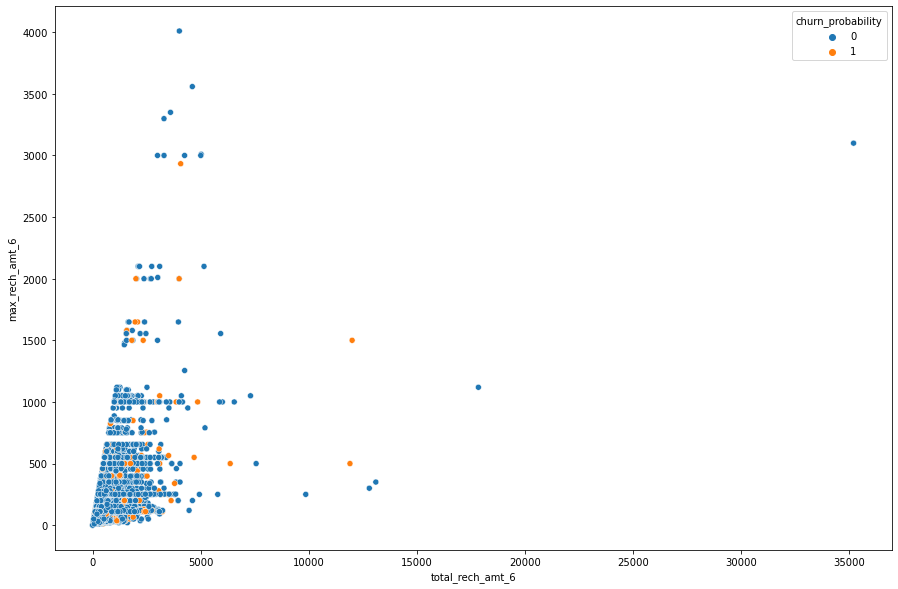

In [127]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = train_data,x = 'total_rech_amt_6',y='max_rech_amt_6', hue ='churn_probability')
plt.show()

In [132]:
train_data.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
id,1.000000,0.000225,0.003596,0.003855,0.002694,0.006079,0.002635,-0.007576,-0.005042,-0.004057,...,0.000165,-0.000313,-0.000702,0.006768,0.004040,0.003071,-0.001669,0.002383,-0.000559,0.002957
arpu_6,0.000225,1.000000,0.743730,0.643193,0.448464,0.324367,0.260325,0.611666,0.455601,0.361843,...,0.066930,0.050399,0.025875,0.168365,0.184225,0.217785,0.025351,0.278894,0.127818,0.079426
arpu_7,0.003596,0.743730,1.000000,0.782332,0.320306,0.429194,0.341899,0.464633,0.596208,0.465589,...,0.094972,0.065798,0.023818,0.189943,0.218318,0.171154,-0.057809,0.231507,0.250422,0.161897
arpu_8,0.003855,0.643193,0.782332,1.000000,0.241351,0.326063,0.421101,0.370681,0.468942,0.590380,...,0.069332,0.099576,0.033256,0.224868,0.177637,0.157545,-0.157566,0.154766,0.220998,0.245406
onnet_mou_6,0.002694,0.448464,0.320306,0.241351,1.000000,0.733869,0.597803,0.198862,0.143492,0.115337,...,0.008561,-0.008027,-0.037880,-0.011634,-0.011124,-0.006776,0.047915,0.187286,0.099616,0.077579
onnet_mou_7,0.006079,0.324367,0.429194,0.326063,0.733869,1.000000,0.787487,0.154464,0.192667,0.153440,...,0.001678,-0.003264,-0.039066,-0.008471,-0.007196,-0.011344,-0.008099,0.167457,0.167638,0.118994
onnet_mou_8,0.002635,0.260325,0.341899,0.421101,0.597803,0.787487,1.000000,0.132497,0.164019,0.195111,...,0.007992,0.001012,-0.035631,-0.003689,-0.006943,-0.006914,-0.071568,0.114501,0.155151,0.162451
offnet_mou_6,-0.007576,0.611666,0.464633,0.370681,0.198862,0.154464,0.132497,1.000000,0.740488,0.573433,...,-0.001848,-0.002174,0.004003,0.017488,0.017396,0.023591,0.028187,0.219203,0.113013,0.084460
offnet_mou_7,-0.005042,0.455601,0.596208,0.468942,0.143492,0.192667,0.164019,0.740488,1.000000,0.755700,...,0.000912,-0.001043,-0.005929,0.015918,0.014396,0.010160,-0.029543,0.196541,0.197221,0.131752
offnet_mou_8,-0.004057,0.361843,0.465589,0.590380,0.115337,0.153440,0.195111,0.573433,0.755700,1.000000,...,0.002024,0.009956,-0.003103,0.023485,0.015729,0.011707,-0.096774,0.126477,0.182223,0.184865


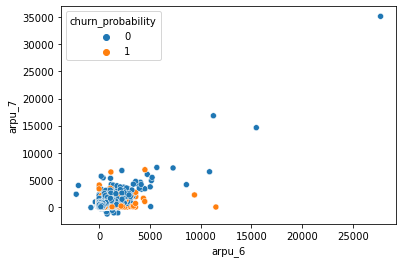

In [133]:
plt.subplot()
sns.scatterplot(data =train_data,x = 'arpu_6',y ='arpu_7',hue='churn_probability')
plt.show()

In [139]:
train_data.groupby('churn_probability').arpu_7.median()

churn_probability
0    198.916
1    118.348
Name: arpu_7, dtype: float64

In [140]:
train_data.groupby('churn_probability').arpu_8.median()

churn_probability
0    210.0260
1      9.9695
Name: arpu_8, dtype: float64

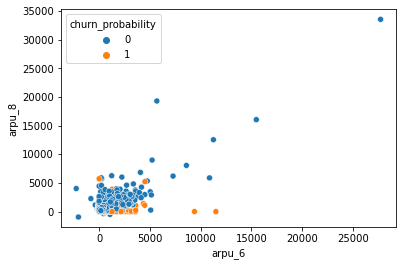

In [141]:
plt.subplot()
sns.scatterplot(data =train_data,x = 'arpu_6',y ='arpu_8',hue='churn_probability')
plt.show()

**Observation**

All most all the columns has outlier values. We need to give outlier treatment to those columns which has outliers.

In [142]:
train_data.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8'],
      dtype='object', length=129)

In [143]:
corr = train_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.743730
arpu_8              arpu_6              0.643193
                    arpu_7              0.782332
onnet_mou_7         onnet_mou_6         0.733869
onnet_mou_8         onnet_mou_7         0.787487
offnet_mou_6        arpu_6              0.611666
offnet_mou_7        offnet_mou_6        0.740488
offnet_mou_8        offnet_mou_7        0.755700
roam_ic_mou_8       roam_ic_mou_7       0.634789
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.790433
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.699338
                    loc_og_t2t_mou_7    0.815622
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.791295
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.694145
                    loc_og_t2m_mou_7    0.814139
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.773510
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.707325
                    loc_og_t2f_mou_7    0.779252
loc_og_mou_6        loc_og_t2t_mou_6    0.773944
                    loc_og_t2t_mou_7    0.626296
                    

In [146]:
og_col_list = [s for s in train_data.columns if 'og' in s] 
ic_col_list = [s for s in train_data.columns if 'ic' in s]
2g_col_list = [s for s in train_data.columns if '2g' in s]
3g_col_list = [s for s in train_data.columns if '3g' in s]


In [147]:
 list(filter(lambda x: 'og' in x, train_data.columns))

['roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

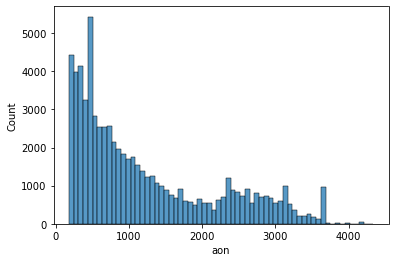

In [149]:
# Column aon (Age on network - number of days the customer is using the operator T network)
sns.histplot(data =train_data,x='aon')
plt.show()

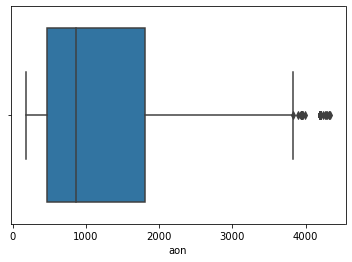

In [153]:
sns.boxplot(data =train_data,x='aon')
plt.show()

In [154]:
train_data.groupby('churn_probability').aon.median()

churn_probability
0    925.0
1    570.5
Name: aon, dtype: float64

In [155]:
train_data.churn_probability.dtype

dtype('int64')

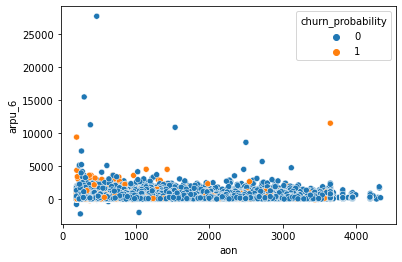

In [156]:
sns.scatterplot(data=train_data,x='aon',y='arpu_6',hue='churn_probability')
plt.show()

# Outlier Treatment 

All most all the continuous variables needs outlier treatment.


In [180]:
# Outlier treatment to the all variables except 'id','churn_probability','day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'
out_var = train_data.columns.drop(['id','churn_probability','day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'])

In [186]:
# Outlier treatment to the variable using IQR of Q1 = 0.015 and Q3 = .99
Q1 = train_data[out_var].quantile(0.01)
Q3 = train_data[out_var].quantile(0.99)
IQR = Q3 - Q1

treated_data = train_data[~((train_data[out_var] < (Q1 - 1.5 * IQR)) |(train_data[out_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [187]:
treated_data.shape

(63833, 129)

In [188]:
treated_data['churn_probability'].value_counts()

0    57300
1     6533
Name: churn_probability, dtype: int64

In [197]:
train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

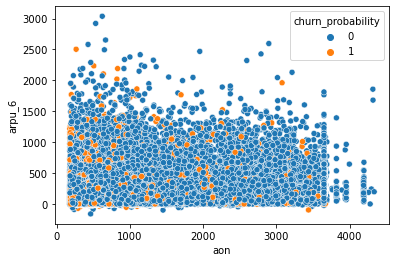

In [189]:
# Plot the scatter graph for age on network vs average revenue per user of June month
sns.scatterplot(data=treated_data,x='aon',y='arpu_6',hue='churn_probability')
plt.show()

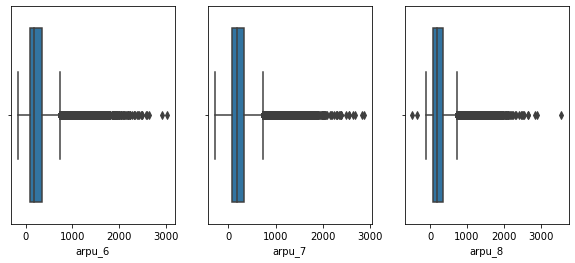

In [251]:
# box plot for arpu_6,arpu_7 and arpu_8 variable 
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.boxplot(data=treated_data,x='arpu_6')
plt.subplot(1,3,2)
sns.boxplot(data =treated_data,x='arpu_7')
plt.subplot(1,3,3)
sns.boxplot(data =treated_data,x='arpu_8')
plt.show()

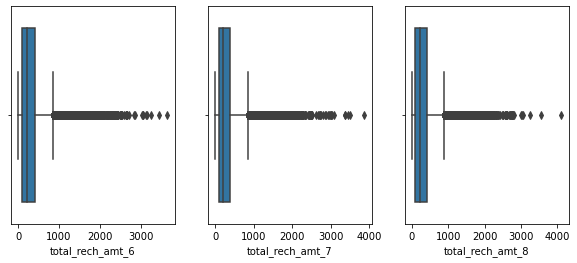

In [252]:
# box plot for total_rech_amt_6,total_rech_amt_7 and total_rech_amt_8 variable 
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.boxplot(data=treated_data,x='total_rech_amt_6')
plt.subplot(1,3,2)
sns.boxplot(data =treated_data,x='total_rech_amt_7')
plt.subplot(1,3,3)
sns.boxplot(data =treated_data,x='total_rech_amt_8')
plt.show()

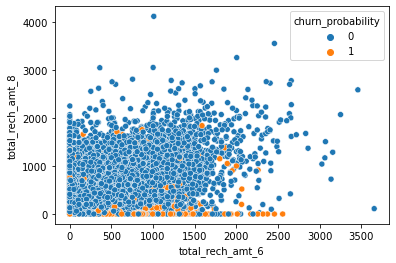

In [196]:
# Plot the graph to compare total recharge amount on June and August month for churn 
sns.scatterplot(data = treated_data,x='total_rech_amt_6',y='total_rech_amt_8',hue='churn_probability')
plt.show()

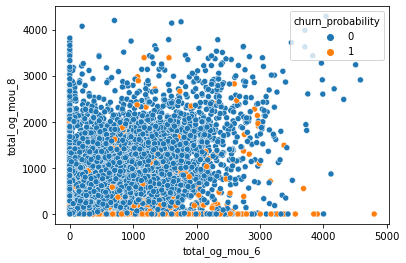

In [213]:
# Plot the graph to compare total outgoing calls on June and August month for churn 
sns.scatterplot(data = treated_data,x='total_og_mou_6',y='total_og_mou_8',hue='churn_probability')
plt.show()

**Observation**

Now the dataset is little free from outliers.


In [199]:
# Consider the churn data to analyse which features are affecting the customer to churn.
churn_data = treated_data[treated_data['churn_probability'] == 1]

In [200]:
churn_data.shape

(6533, 129)

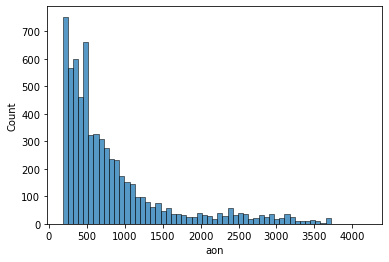

In [214]:
#Plot histogram of churn data for aon(Age on network) 
sns.histplot(data = churn_data,x='aon')
plt.show()

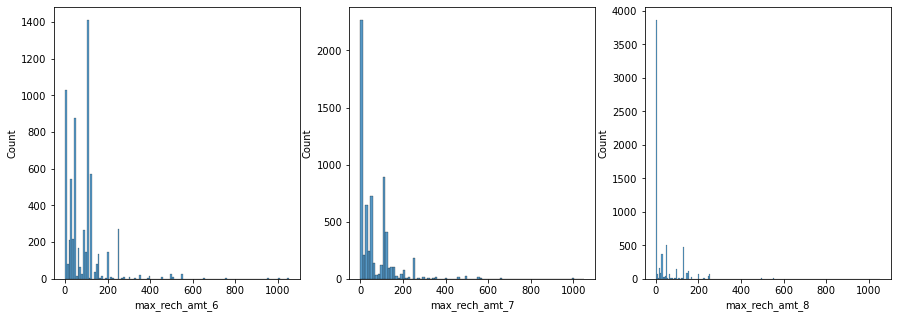

In [240]:
#Plot histogram of churn data for maximum recharge amount 'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='max_rech_amt_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='max_rech_amt_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='max_rech_amt_8')
plt.show()

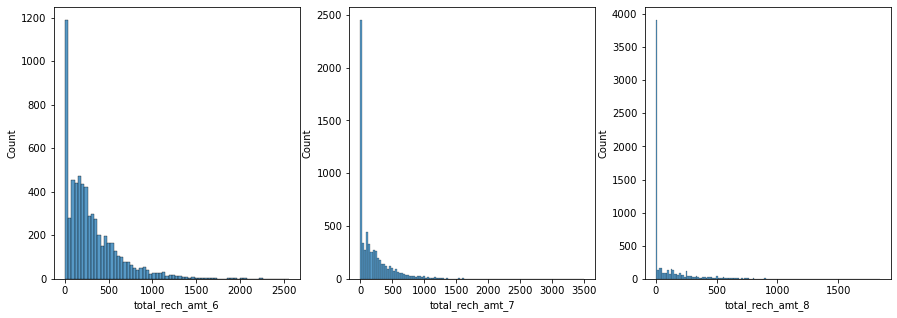

In [241]:
#Plot histogram of churn data for total recharge amount total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_rech_amt_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_rech_amt_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_rech_amt_8')
plt.show()

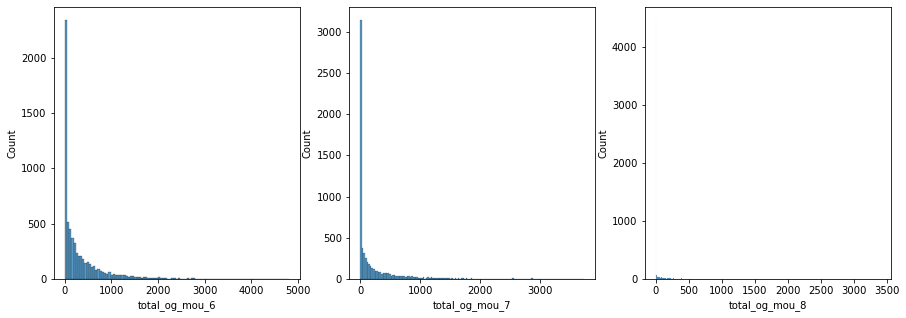

In [243]:
#Plot histogram of churn data for total outgoing minute of voice calls total_og_mou_6,total_og_mou_7,total_og_mou_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_og_mou_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_og_mou_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_og_mou_8')
plt.show()

In [247]:
churn_data[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,6533.000000,6533.000000,6533.000000
mean,325.162515,218.617098,83.109421
std,478.301398,410.931726,248.676281
min,0.000000,0.000000,0.000000
25%,1.690000,0.000000,0.000000
50%,134.560000,35.160000,0.000000
75%,441.880000,249.260000,30.760000
max,4805.230000,3732.560000,3391.510000


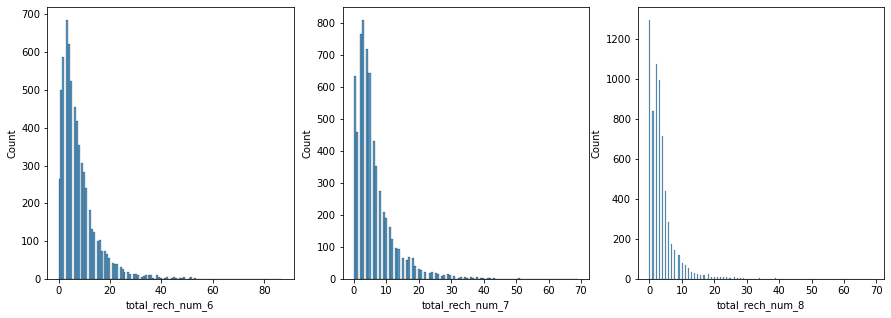

In [248]:
#Plot histogram of churn data for total outgoing minute of voice calls total_rech_num_6, total_rech_num_7, total_rech_num_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='total_rech_num_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='total_rech_num_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='total_rech_num_8')
plt.show()

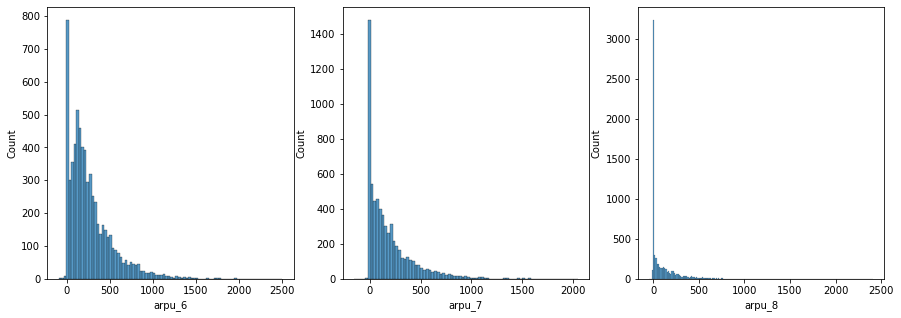

In [249]:
#Plot histogram of churn data for total outgoing minute of voice calls arpu_6, arpu_7, arpu_8
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data = churn_data,x='arpu_6')
plt.subplot(1,3,2)
sns.histplot(data = churn_data,x='arpu_7')
plt.subplot(1,3,3)
sns.histplot(data = churn_data,x='arpu_8')
plt.show()

**Observation**



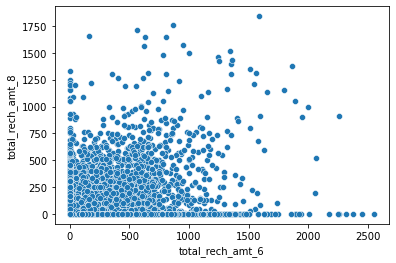

In [211]:
# Plot the graph to compare total recharge amount on June and August month for churn data
sns.scatterplot(data = churn_data,x='total_rech_amt_6',y='total_rech_amt_8')
plt.show()

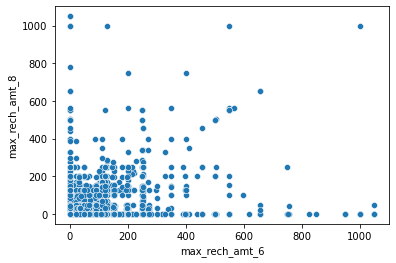

In [212]:
# Plot the graph to compare maximum recharge amount on June and August month for churn data
sns.scatterplot(data = churn_data,x='max_rech_amt_6',y='max_rech_amt_8')
plt.show()

In [208]:
churn_data.columns[:70]

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_

In [209]:
churn_data.columns[70:]

Index(['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_

# Feature Engineering

In [ ]:
# Create total minutes of usage voice calls for June , July and August month - total_mou_6, total_mou_7,total_mou_8
'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',